In [1]:
# Data manipulation, analysis and statistics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# Feature extraction for word features into numerical for analytics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Pipeline to wrap up extraction and training classifier
from sklearn.pipeline import Pipeline

# Classifier evaluation
from sklearn.model_selection import cross_val_score

# Stopwords corpus to be excluded from word features
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

# Stemming to reduce each word to its stem
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Utilities
import re
import string
from urllib.parse import unquote_plus
import validators

In [2]:
# Import dataset
df = pd.read_excel('Comment Spam.xls', index_col='No')

# Preview dataset
df.head()

,Comment,Class
No,,
1,this song is racist,0
2,and how many subscribers compared to her over ...,1
3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
4,well done shakira,0
5,:D subscribe to me for daily vines,1


In [3]:
# Check the distribution of target label (Class)
df['Class'].value_counts()

1    669
0    631
Name: Class, dtype: int64

In [4]:
# Copy the original data into another variable to be processed
processed_df = df.copy()

# Preview processed dataframe
processed_df.head()

,Comment,Class
No,,
1,this song is racist,0
2,and how many subscribers compared to her over ...,1
3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
4,well done shakira,0
5,:D subscribe to me for daily vines,1


In [5]:
# Describe Comment
processed_df['Comment'].describe()

count                                  1300
unique                                 1162
top       Check out this video on YouTube:﻿
freq                                     74
Name: Comment, dtype: object

In [6]:
# Preview duplicated 'Comment' with the frequencies
comment_value_counts = processed_df['Comment'].value_counts()
duplicated_comment_counts = comment_value_counts[comment_value_counts > 1]
print('Number of duplicated comment: ', len(duplicated_comment_counts))
duplicated_comment_counts

Number of duplicated comment:  40


Check out this video on YouTube:﻿                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  74
Check out this playlist on YouTube:﻿                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [7]:
# Expand all the duplicated 'Comment'
duplicated_comment_df = processed_df[processed_df['Comment'].isin(duplicated_comment_counts.keys())].sort_values(by='Comment')
duplicated_comment_df

,Comment,Class
No,,
187,Check out my SEXY VIDEO :*,1
276,Check out my SEXY VIDEO :*,1
252,subscribe to my feed,1
67,subscribe to my feed,1
10,******* Facebook is LAME and so 2004! Check ou...,1
19,******* Facebook is LAME and so 2004! Check ou...,1
165,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
17,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
41,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1


In [8]:
# Grouping all the duplicated 'Comment' and look up to all the value of the 'Class'
duplicated_comment_with_class_df = duplicated_comment_df.groupby('Comment')['Class'].apply(lambda x: x.unique()).reset_index()
duplicated_comment_with_class_df

,Comment,Class
0,Check out my SEXY VIDEO :*,[1]
1,subscribe to my feed,[1]
2,******* Facebook is LAME and so 2004! Check ou...,[1]
3,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,[1]
4,:),[0]
5,:)﻿,[0]
6,:D subscribe to me for daily vines,[1]
7,Check Out The New Hot Video By Dante B Called ...,[1]
8,Check out this playlist on YouTube:﻿,[1]
9,Check out this video on YouTube:﻿,[1]


It seems that all the duplicated 'Comment' only have one single 'Class'

In [9]:
# Complete the punctuations needed to be removed from words
punctuations = string.punctuation + '“”'

# Function to clean and tokenize sentence
def clean_and_tokenize(sentence):
    # Decode any url/query string in a sentence
    sentence = unquote_plus(sentence)
    
    # Convert to lowercase and split the sentence into words
    words = sentence.lower().split()
    
    # Replace all URL-s in words into 'url'
    for i, w in enumerate(words):
        if (validators.url(w)):
            words[i] = 'url'
    
    # Removing several pronouns from stopwords because it could be meaningful for spam detection
    pronouns = {'i', 'it', 'me', 'my',
               'myself', 'our', 'ours', 'ourselves', 'we',
               'you', 'you\'re', 'your', 'yourself', 'yourselves'}
    stops.difference_update(pronouns)
    
    # Remove stopwords from words and any letter in word contains punctuations
    words = [w.translate(w.maketrans('', '', punctuations)) for w in words if (not w in stops)]
        
    # Remove any non-alphanumeric letters
    regex = re.compile('[^a-zA-Z0-9]')
    words = [regex.sub('', w) for w in words]
    
    # Check for stopwords again, get only alphabets and convert into stem words
    words = [stemmer.stem(w) for w in words if (not w in stops) and w.isalpha()]
    
    # Check for stopwords after stemming
    words = [w for w in words if (not w in stops)]
    
    return words

In [10]:
# Apply cleaning and tokenizing for 'Comment' into 'tokenized_Comment'
processed_df['tokenized_Comment'] = processed_df['Comment'].apply(lambda comment: clean_and_tokenize(comment))
processed_df.sort_values(by='Comment')

,Comment,Class,tokenized_Comment
No,,,
276,Check out my SEXY VIDEO :*,1,"[check, my, sexi, video]"
187,Check out my SEXY VIDEO :*,1,"[check, my, sexi, video]"
225,Eminem is the king of rap Micheal Jackson i...,1,"[eminem, king, rap, micheal, jackson, king, po..."
45,"Haha , Miley Cyrus has done it once again T...",1,"[haha, miley, cyru, done, it, today, someon, l..."
76,Perhaps you have seen the newest Miley Cyrus...,1,"[perhap, you, seen, newest, miley, cyru, secre..."
1247,<br />Please help me get 100 subscribers by t...,1,"[br, pleas, help, me, get, subscrib, end, nigh..."
616,GO TO MY CHANNEL and check out my written songs﻿,1,"[go, my, channel, check, my, written, song]"
196,HI IM 14 YEAR RAPPER SUPPORT ME GUY AND CHECK...,1,"[hi, im, year, rapper, support, me, guy, check..."
1205,Hey everyone!! I have just started my first Y...,1,"[hey, everyon, i, start, my, first, yt, channe..."


In [11]:
# Preview the dataframe sort by size of 'tokenized_Comment'
processed_df['len_tokenized_Comment'] = processed_df['tokenized_Comment'].str.len()
processed_df.sort_values(by='len_tokenized_Comment', ascending=True)

,Comment,Class,tokenized_Comment,len_tokenized_Comment
No,,,,
72,ｈｔｔｐ://ｗｗｗ.ｅｂａｙ.ｃｏｍ/ｕｓｒ/ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,1,[],0
523,2015 and more....﻿,0,[],0
512,:3﻿,0,[],0
1176,:)﻿,0,[],0
862,▬▬▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬ ＤＡＭＮ ＴＨＩＳ ＣＯＭＭＥＮＴ ＩＳ Ｆ...,0,[],0
951,❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿,0,[],0
82,:),0,[],0
458,:D﻿,0,[],0
928,:)﻿,0,[],0


In [12]:
# Check all the words which appear in the 'Comment'
bag_of_words = set()
for words in list(processed_df['tokenized_Comment']):
    for word in words:
        bag_of_words.add(word)
print('Number of words: ', len(bag_of_words))
sorted(bag_of_words)

Number of words:  2388


['aaaaaaa',
 'abl',
 'ablaz',
 'abomin',
 'absolut',
 'absorb',
 'abus',
 'abusedmistr',
 'acaer',
 'access',
 'accessori',
 'accident',
 'accomplish',
 'account',
 'achiev',
 'acid',
 'acoust',
 'acquir',
 'across',
 'act',
 'activ',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addfollow',
 'addict',
 'addit',
 'adel',
 'adfli',
 'adhoc',
 'admir',
 'admit',
 'ador',
 'adoult',
 'adsens',
 'advanc',
 'advertis',
 'advertisementsbr',
 'advertisi',
 'advic',
 'afflict',
 'afford',
 'afraid',
 'africa',
 'african',
 'aftermath',
 'age',
 'ago',
 'agre',
 'agreeabl',
 'ah',
 'ahead',
 'ahhh',
 'air',
 'airplan',
 'aka',
 'album',
 'alcohol',
 'alex',
 'alfr',
 'aliv',
 'allinon',
 'allot',
 'allow',
 'allway',
 'almost',
 'aloidia',
 'alon',
 'alot',
 'alreadi',
 'also',
 'altern',
 'alvar',
 'alway',
 'amaz',
 'amazon',
 'ambiti',
 'america',
 'american',
 'amiabl',
 'amount',
 'amp',
 'anaconda',
 'anderson',
 'andrew',
 'android',
 'angel',
 'angri',
 'anim',
 '

In [13]:
# Join the tokenized 'Comment' which words will be extracted as features
processed_df['joined_tokenized_Comment'] = processed_df['tokenized_Comment'].apply(lambda token: ' '.join(token))
processed_df.sort_values(by='len_tokenized_Comment', ascending=False)

,Comment,Class,tokenized_Comment,len_tokenized_Comment,joined_tokenized_Comment
No,,,,,
500,im sorry for the spam but My name is Jenny. I ...,1,"[im, sorri, spam, my, name, jenni, i, go, high...",130,im sorri spam my name jenni i go high school e...
845,"Hey Guys, I know you tend to skip these commen...",1,"[hey, guy, i, know, you, tend, skip, comment, ...",68,hey guy i know you tend skip comment take look...
198,••••►►My name is George and let me tell u EMIN...,1,"[my, name, georg, let, me, tell, u, eminem, my...",65,my name georg let me tell u eminem my idol my ...
1012,"Hi there~I'm group leader of Angel, a rookie K...",1,"[hi, thereim, group, leader, angel, rooki, kor...",65,hi thereim group leader angel rooki korean pop...
326,"This great Warning will happen soon. ,0\nLneaD...",1,"[great, warn, happen, soon, shaeel, guy, im, o...",63,great warn happen soon shaeel guy im old rappe...
6,"Part 2. Holy Mary, pray for us Holy Mother of ...",1,"[part, holi, mari, pray, us, holi, mother, god...",63,part holi mari pray us holi mother god pray us...
1107,Hey I think I know what where dealing with her...,0,"[hey, i, think, i, know, deal, i, theori, coul...",63,hey i think i know deal i theori couldv gotten...
256,hey guy if you can please SUBSCRIBE to my chan...,1,"[hey, guy, you, pleas, subscrib, my, channel, ...",62,hey guy you pleas subscrib my channel im young...
310,hey guys if you guys can please SUBSCRIBE to m...,1,"[hey, guy, you, guy, pleas, subscrib, my, chan...",62,hey guy you guy pleas subscrib my channel youn...


In [14]:
# Function to display wordclouds for each class
def display_wordcloud(classes):
    plt.figure(figsize=(20,20), facecolor='k')
    for i, class_ in enumerate(classes):
        words = ' '.join(processed_df[processed_df['Class'] == class_]['joined_tokenized_Comment'])
        word_cloud = WordCloud(width=512, height=512).generate(words)
        title = 'Spam'
        if (i == 0):
            title = 'Not Spam'
        plt.subplot(1, 2, i+1).set_title(title, color='white', fontsize=30)
        plt.plot()
        plt.imshow(word_cloud)
        plt.axis('off')
    plt.show()

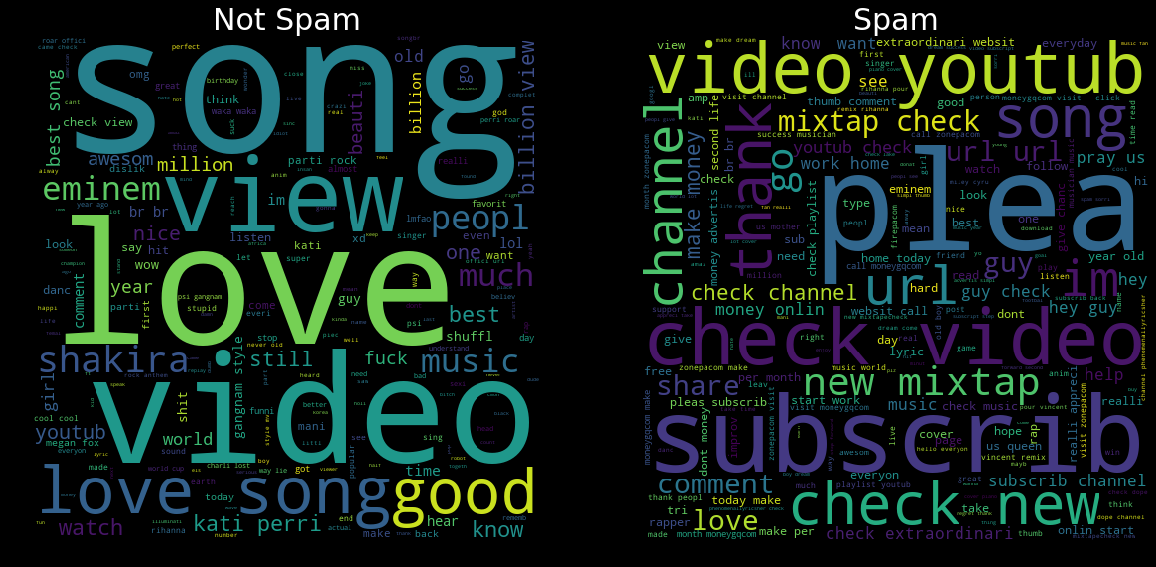

In [15]:
# Display wordcloud for each class in 'processed_df' (spam / not spam)
classes = list(set(processed_df['Class']))
display_wordcloud(classes)

In [16]:
# Determine feature 'X' and target label 'y'
X = processed_df['joined_tokenized_Comment']
y = processed_df['Class']

In [17]:
# State several ML classifiers for building the model
classifiers = [MultinomialNB(), LogisticRegression(random_state=0), SGDClassifier(random_state=0)]

In [18]:
# Train the model for all classifier in 'classifiers' by doing CountVectorizer and TfIdfTransformer -> put all into a pipeline
# Model trained using cross validation with 'accuracy' as the metric
all_scores = []
for i, classifier in enumerate(classifiers):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    
    all_scores.append(scores.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [19]:
# See the accuracy result of each classifier
scoring_df = pd.DataFrame({'Classifier': ['Multinomial Naive Bayes', 'Logistic Regression', 'SGD Classifier'],
                           'Accuracy': all_scores})
scoring_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
2,SGD Classifier,0.931526
1,Logistic Regression,0.923082
0,Multinomial Naive Bayes,0.890017
